<a href="https://colab.research.google.com/github/PurnaPrakashNissy10/PurnaPrakashNissy10/blob/main/ECommerceanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Setup and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
 df = pd.read_csv("/content/ecommerce_dataset_updated.csv")

In [46]:
df

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date,YearMonth
0,337c166f,f414122f-e,Sports,36.53,15.0,31.05,Net Banking,2024-11-12,2024-11
1,d38a19bf,fde50f9c-5,Clothing,232.79,20.0,186.23,Net Banking,2024-02-09,2024-02
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25.0,237.76,Credit Card,2024-09-01,2024-09
3,395d4994,964fc44b-d,Toys,173.19,25.0,129.89,UPI,2024-04-01,2024-04
4,a83c145c,d70e2fc6-e,Beauty,244.80,20.0,195.84,Net Banking,2024-09-27,2024-09
...,...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,NaN,NaN,NaN,UPI,2024-05-14,2024-05
3656,34ebc1a0,08838c2c-9,Toys,NaN,NaN,NaN,Cash on Delivery,2024-11-19,2024-11
3657,1defd3b1,c39a4f16-6,Home & Kitchen,NaN,NaN,NaN,Net Banking,2024-08-07,2024-08
3658,0611293d,b4f67f96-9,Electronics,NaN,NaN,NaN,UPI,2024-05-21,2024-05


In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [35]:
df.isnull().sum()

df.dropna(inplace=True)

In [36]:
print(df['Price (Rs.)'].dtype)


float64


In [37]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], format='%d-%m-%Y')
df['Price (Rs.)'] = df['Price (Rs.)'].head()
df['Final_Price(Rs.)'] = df['Final_Price(Rs.)'].head()
df['Discount (%)'] = df['Discount (%)'].head()


Exploratory Data Analysis (EDA)

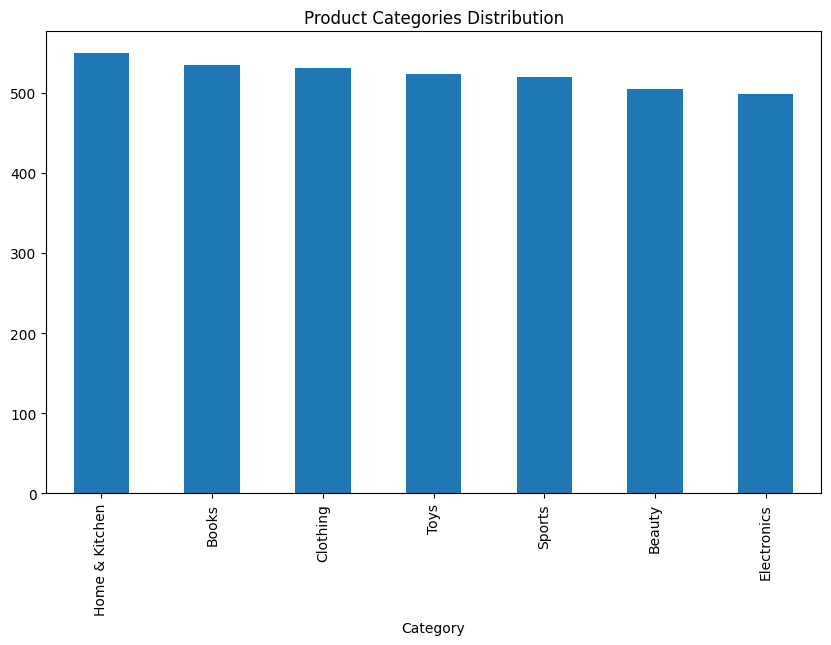

<Axes: xlabel='Category', ylabel='Final_Price(Rs.)'>

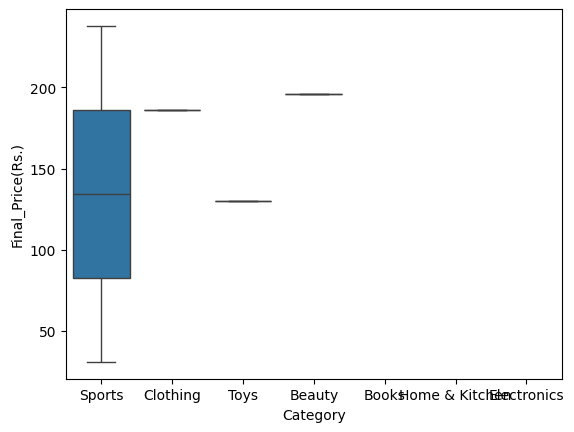

In [38]:
df['Category'].value_counts().plot(kind='bar', figsize=(10, 6), title='Product Categories Distribution')
plt.show()

sns.boxplot(data=df, x='Category', y='Final_Price(Rs.)')


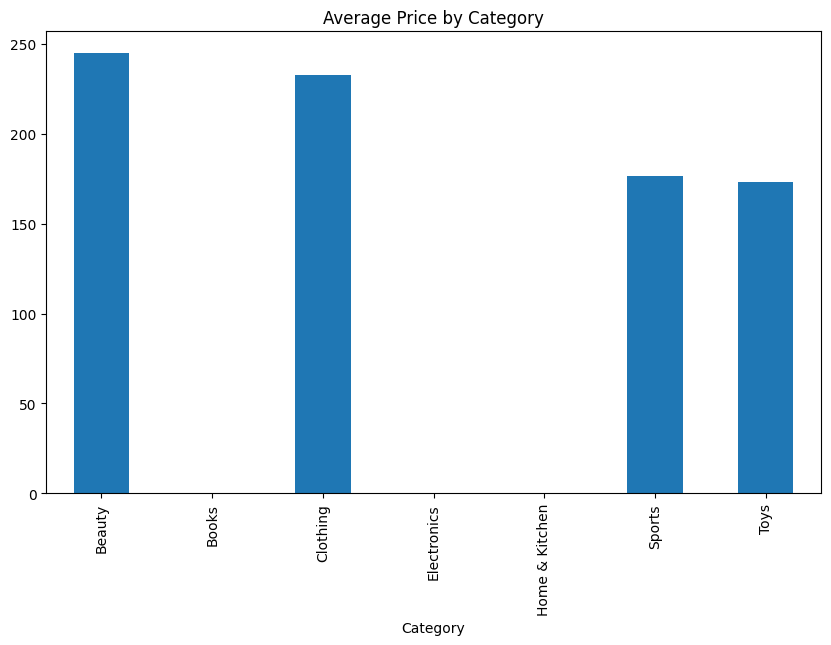

In [39]:
avg_price = df.groupby('Category')['Price (Rs.)'].mean()
avg_price.plot(kind='bar', figsize=(10, 6), title='Average Price by Category')
plt.show()


<ipython-input-40-9e7a05aa961f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Payment_Method', palette='viridis')


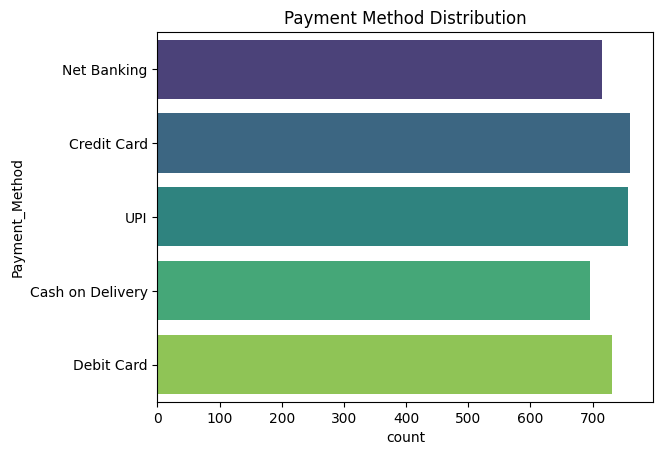

In [40]:
sns.countplot(data=df, y='Payment_Method', palette='viridis')
plt.title("Payment Method Distribution")
plt.show()


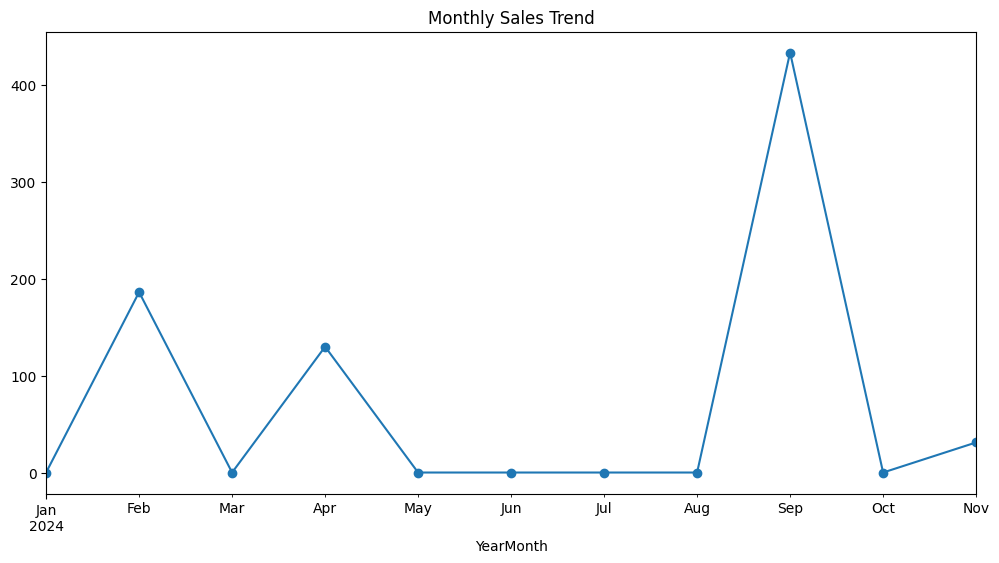

In [41]:
df['YearMonth'] = df['Purchase_Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Final_Price(Rs.)'].sum()
monthly_sales.plot(figsize=(12, 6), marker='o', title='Monthly Sales Trend')
plt.show()


Visualizations

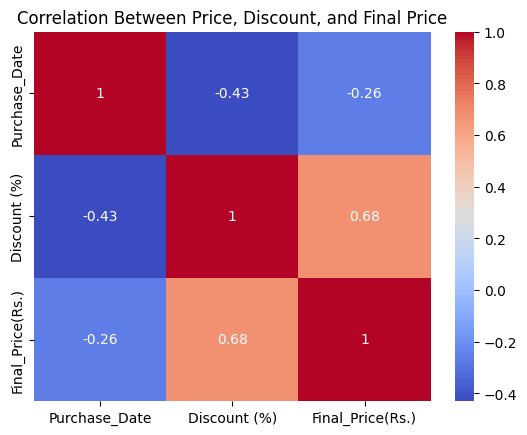

In [42]:
corr = df[['Purchase_Date', 'Discount (%)', 'Final_Price(Rs.)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Price, Discount, and Final Price")
plt.show()

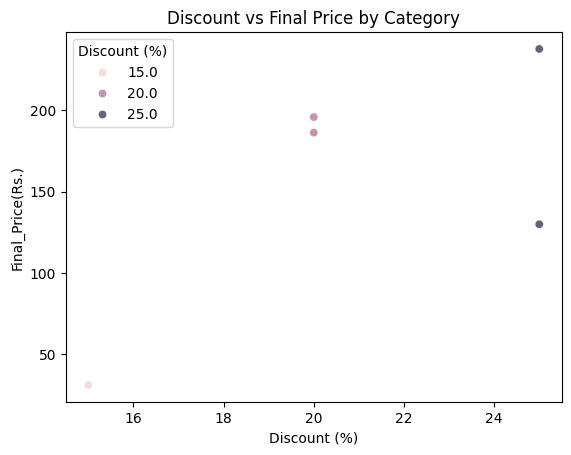

In [43]:
sns.scatterplot(data=df, x='Discount (%)', y='Final_Price(Rs.)', hue='Discount (%)', alpha=0.7)
plt.title("Discount vs Final Price by Category")
plt.show()


In [53]:
print(df.columns)

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date', 'YearMonth'],
      dtype='object')


In [52]:
category_filter = 'Sports'
filtered_df = df[df['Discount (%)'] == category_filter]
print(filtered_df)

Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date, YearMonth]
Index: []


Filters

In [57]:
price_filtered_df = df[(df['Final_Price(Rs.)'] >= 100) & (df['Final_Price(Rs.)'] <= 500)]
print(price_filtered_df)

    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
1  d38a19bf  fde50f9c-5  Clothing       232.79          20.0   
2  d7f5f0b0  0d96fc90-3    Sports       317.02          25.0   
3  395d4994  964fc44b-d      Toys       173.19          25.0   
4  a83c145c  d70e2fc6-e    Beauty       244.80          20.0   

   Final_Price(Rs.) Payment_Method Purchase_Date YearMonth  
1            186.23    Net Banking    2024-02-09   2024-02  
2            237.76    Credit Card    2024-09-01   2024-09  
3            129.89            UPI    2024-04-01   2024-04  
4            195.84    Net Banking    2024-09-27   2024-09  


In [58]:
start_date, end_date = '2024-01-01', '2024-12-31'
date_filtered_df = df[(df['Purchase_Date'] >= start_date) & (df['Purchase_Date'] <= end_date)]
print(date_filtered_df)

       User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0     337c166f  f414122f-e          Sports        36.53          15.0   
1     d38a19bf  fde50f9c-5        Clothing       232.79          20.0   
2     d7f5f0b0  0d96fc90-3          Sports       317.02          25.0   
3     395d4994  964fc44b-d            Toys       173.19          25.0   
4     a83c145c  d70e2fc6-e          Beauty       244.80          20.0   
...        ...         ...             ...          ...           ...   
3655  67abda0a  28714133-6          Beauty          NaN           NaN   
3656  34ebc1a0  08838c2c-9            Toys          NaN           NaN   
3657  1defd3b1  c39a4f16-6  Home & Kitchen          NaN           NaN   
3658  0611293d  b4f67f96-9     Electronics          NaN           NaN   
3659  e73ad07c  a5d07442-d  Home & Kitchen          NaN           NaN   

      Final_Price(Rs.)    Payment_Method Purchase_Date YearMonth  
0                31.05       Net Banking    2024-11-12  

In [54]:
print(df['Final_Price(Rs.)'].min(), df['Final_Price(Rs.)'].max())


31.05 237.76


In [55]:
print(df['Purchase_Date'].min(), df['Purchase_Date'].max())

2024-01-01 00:00:00 2024-11-21 00:00:00


In [50]:
min_price, max_price = 1000, 5000
price_filtered_df = df[(df['Final_Price(Rs.)'] >= min_price) & (df['Final_Price(Rs.)'] <= max_price)]
print(price_filtered_df.head())

Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date, YearMonth]
Index: []


In [51]:
start_date, end_date = '2023-01-01', '2023-06-30'
date_filtered_df = df[(df['Purchase_Date'] >= start_date) & (df['Purchase_Date'] <= end_date)]
print(date_filtered_df)

Empty DataFrame
Columns: [User_ID, Product_ID, Category, Price (Rs.), Discount (%), Final_Price(Rs.), Payment_Method, Purchase_Date, YearMonth]
Index: []


Insights

In [59]:
category_revenue = df.groupby('Category')['Final_Price(Rs.)'].sum().sort_values(ascending=False)
print(category_revenue)

Category
Sports            268.81
Beauty            195.84
Clothing          186.23
Toys              129.89
Books               0.00
Electronics         0.00
Home & Kitchen      0.00
Name: Final_Price(Rs.), dtype: float64


In [63]:
print(df['Final_Price(Rs.)'].max())
print(df['Final_Price(Rs.)'].describe())


237.76
count      5.000000
mean     156.154000
std       79.812111
min       31.050000
25%      129.890000
50%      186.230000
75%      195.840000
max      237.760000
Name: Final_Price(Rs.), dtype: float64


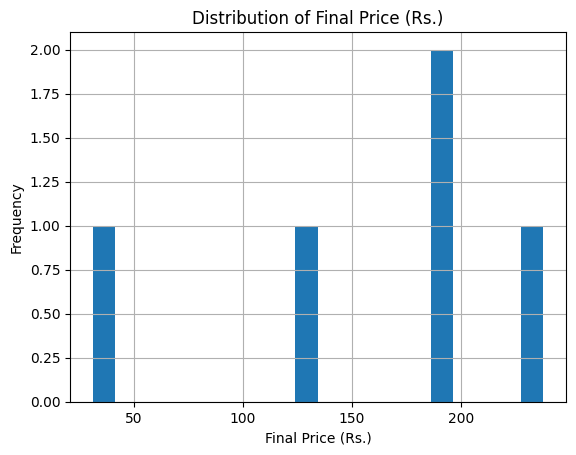

In [64]:
import matplotlib.pyplot as plt
df['Final_Price(Rs.)'].hist(bins=20)
plt.title("Distribution of Final Price (Rs.)")
plt.xlabel("Final Price (Rs.)")
plt.ylabel("Frequency")
plt.show()

In [65]:
threshold = 150
high_value_df = df[df['Final_Price(Rs.)'] > threshold]
high_value_payment = high_value_df['Payment_Method'].value_counts()

print(high_value_payment)

Payment_Method
Net Banking    2
Credit Card    1
Name: count, dtype: int64
